# Neural Message Passing for Quantum Chemistry

Ref: https://arxiv.org/pdf/1704.01212.pdf

Assumptions:
1. Hidden states for atoms are not updated (only for atoms).

## 1. Directed models

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.autograd import Variable
from utils import rolling_mean
from data import DataPreprocessor
from mpnn.mpnn_directed import MPNNdirected
from mpnn.directed import Rd, Vd, Ud, Ed

In [33]:
at_feat = 75
edg_feat = 6
passes = 4
rd = Rd(inp_size=at_feat*2, hid_size=32)
vd = Vd(inp_size=at_feat)
ud = Ud(inp_size=at_feat*2+edg_feat, out_size=at_feat)
ed = Ed(inp_size=edg_feat)

In [34]:
mpnn = MPNNdirected(rd, ud, vd, ed, passes)

In [35]:
DATASET = 'data.test'

In [36]:
data = DataPreprocessor(DATASET, filter_dots=True, filter_atoms=True)

In [37]:
data.load_dataset()

File data.test read. In total 1696 lines.


In [38]:
data.filter_data()

Data filtered, in total 220 smiles deleted


In [39]:
train_smiles, train_labels, valid_smiles, valid_labels, test_smiles, test_labels = data.get_data()

File data.test read. In total 1696 lines.
Data filtered, in total 220 smiles deleted
About to generate scaffolds
Generating scaffold 0/1476
Generating scaffold 1000/1476
About to sort in scaffold sets


In [40]:
losses = []

In [54]:
for j in range(100):
    for i in range(100):
        loss = mpnn.make_opt_step(train_smiles[i:i+1], train_labels[i:i+1], passes)
        print(i, loss)
        losses.append(loss)
    print(j)


0 4.880477210653664e-15
1 1.5145697943808045e-05
2 2.4996447846264795e-16
3 6.507264919659132e-26
4 3.0796145963586034e-17
5 4.635095319827087e-05
6 2.3908705596434325e-24
7 6.425190690606541e-07
8 0.0
9 0.1588267832994461
10 0.3285399079322815
11 5.077420016281445e-27
12 1.1222670082133845e-06
13 8.814917684674128e-10
14 4.360357763744105e-07
15 0.04095141589641571
16 0.06091604009270668
17 3.1996797850052207e-24
18 0.0
19 4.789822583006753e-07
20 1.2916881868713656e-17
21 0.00037930457619950175
22 0.9848812818527222
23 0.002007516799494624
24 2.4436184187237586e-09
25 0.07261230051517487
26 0.07156019657850266
27 1.1435584250374387e-11
28 1.5518920500593996e-32
29 2.9761527443883384e-12
30 0.09878962486982346
31 0.0327206626534462
32 0.4809034466743469
33 0.027487201616168022
34 0.0001092465317924507
35 3.1441925885805633e-12
36 1.2858919262725976e-07
37 1.8281843949807808e-07
38 1.833175389265307e-07
39 0.9829658269882202
40 5.894995425137495e-08
41 0.0015900932485237718
42 1.438515

48 6.123452128461683e-30
49 0.37271735072135925
50 1.8690406167198859e-10
51 0.07344061136245728
52 5.113786061272663e-10
53 0.006719641387462616
54 1.1248302856443886e-18
55 9.258032872481912e-28
56 1.7490990022020296e-23
57 1.0
58 0.0002404842816758901
59 1.1832927453365224e-14
60 9.72501134241423e-43
61 4.9919981393031776e-05
62 6.155545953904904e-20
63 1.94843273459977e-12
64 9.674431445003071e-28
65 1.459310623730392e-11
66 0.0016982186352834105
67 0.00018651036953087896
68 1.1066346406948813e-12
69 0.0001416787999914959
70 5.435995059489852e-23
71 0.0116963442414999
72 1.0
73 8.373619493795559e-05
74 5.6376798056589905e-06
75 0.0005079676629975438
76 0.9999982118606567
77 0.0018789279274642467
78 1.1728531828462258e-13
79 2.2215787216863783e-22
80 4.7333539404626965e-15
81 3.598322591361882e-15
82 2.789444565089172e-13
83 8.821815336151304e-36
84 1.3049158975597663e-11
85 1.0
86 0.9997512102127075
87 0.739113450050354
88 0.48233434557914734
89 2.702839298745358e-26
90 2.945036255

0 1.9523585592651216e-07
1 0.28990864753723145
2 3.6987721330206114e-08
3 2.541416304634711e-20
4 5.274064847071713e-07
5 5.984625386190601e-05
6 1.881201222358672e-14
7 0.019480153918266296
8 2.4050345413360403e-40
9 0.0003132148121949285
10 0.987404465675354
11 3.232098900613734e-19
12 0.007688031531870365
13 2.971194771816954e-05
14 0.00045854729251004755
15 0.9720678925514221
16 0.6448556780815125
17 6.777125396835106e-19
18 0.0
19 3.7794472412810975e-11
20 3.695251536131507e-15
21 1.4577335605281405e-06
22 0.5963174700737
23 0.0006602266221307218
24 1.3830411660364916e-07
25 0.04059633985161781
26 0.03923613578081131
27 4.784005014357717e-08
28 4.54235693886257e-24
29 1.2425182660535938e-07
30 0.3930562436580658
31 0.10877201706171036
32 0.5121346712112427
33 0.004671583417803049
34 0.0028011698741465807
35 2.568028492078156e-07
36 0.00015962004545144737
37 0.00010317163832951337
38 0.00010459486657055095
39 0.34038999676704407
40 9.674683951743646e-07
41 0.0012834506342187524
42 

45 0.1368861347436905
46 0.00537699181586504
47 5.597683411906473e-05
48 1.1327219908707775e-05
49 0.012581469491124153
50 4.6787103201495484e-05
51 0.06325685977935791
52 3.716088394867256e-05
53 0.0015248383861035109
54 1.2778143343439297e-07
55 2.792186300625151e-15
56 1.1764109761250525e-22
57 0.9999998807907104
58 2.7337026040186174e-05
59 1.5156457200404816e-09
60 4.0069537134960496e-22
61 0.0005328375264070928
62 7.254246536803066e-09
63 1.122009169601812e-11
64 2.718301948334556e-05
65 1.7993352230405435e-05
66 0.012256625108420849
67 0.0005711273988708854
68 0.06647934764623642
69 0.0004994536284357309
70 1.2235355484335741e-07
71 0.01886175014078617
72 1.0
73 0.0003579292679205537
74 8.94714830792509e-05
75 0.017500976100564003
76 0.9996541142463684
77 0.06302043050527573
78 4.0443524085276294e-09
79 4.844942669279817e-09
80 4.13942657928601e-09
81 2.2030091084701553e-09
82 6.751761927326072e-10
83 3.860700546688136e-31
84 1.0258016800435144e-06
85 1.0
86 0.9995233416557312
8

91 4.397806208089605e-08
92 0.23066668212413788
93 0.018526583909988403
94 0.10291314125061035
95 0.0005975976819172502
96 0.30602800846099854
97 0.0
98 0.0015037080738693476
99 0.24532243609428406
13
0 1.590756255609449e-06
1 0.39637333154678345
2 3.608823107015269e-08
3 5.659207115107272e-15
4 5.5470436564064585e-06
5 0.0003662607923615724
6 2.0590733978975706e-14
7 0.04191211611032486
8 8.433530037031769e-34
9 0.03303736448287964
10 0.018826505169272423
11 1.6294475790317238e-19
12 0.023977745324373245
13 0.0003303757985122502
14 0.000758569804020226
15 0.0004366360662970692
16 0.10162057727575302
17 4.948802919030321e-19
18 0.0
19 9.29712029584806e-10
20 3.128943501864989e-13
21 5.6238233810290694e-05
22 0.17965726554393768
23 0.00043375007226131856
24 2.0426675462204003e-07
25 0.03434967249631882
26 0.03372148424386978
27 8.387044658775267e-08
28 2.4418887581820173e-24
29 7.2657106997553456e-09
30 0.2567943334579468
31 0.19484716653823853
32 0.4850415289402008
33 0.008062373846769

40 8.050580341256719e-11
41 7.513026957894908e-06
42 7.173945199949732e-29
43 1.6350959475275317e-09
44 0.9999998807907104
45 0.09394203871488571
46 0.0012450017966330051
47 0.0003459468425717205
48 2.974694268687017e-07
49 0.0010093074524775147
50 6.358916834869888e-06
51 0.012351153418421745
52 5.7531574384483974e-06
53 0.0007860625046305358
54 1.1658639331724174e-11
55 1.0965301414627497e-17
56 1.3008321060259916e-23
57 0.9999998807907104
58 1.827457163017243e-05
59 1.6075698064388355e-11
60 5.022569808317726e-29
61 0.00033366758725605905
62 8.856659294842473e-10
63 3.03591158289096e-12
64 0.00012829802290070802
65 0.00024859150289557874
66 0.06098448857665062
67 0.0005914940848015249
68 0.06435848027467728
69 0.0004766968486364931
70 3.1577609860278244e-08
71 0.0069622257724404335
72 1.0
73 0.00030620020697824657
74 0.00021546593052335083
75 0.012562858872115612
76 0.9999107122421265
77 0.1698729544878006
78 3.5785767795240564e-13
79 5.8686535631125025e-09
80 4.2115218105466534e-13

89 3.875106101882953e-21
90 0.0012884765164926648
91 0.001066716038621962
92 0.051719408482313156
93 0.0019349221838638186
94 0.09725234657526016
95 0.0006373583455570042
96 0.25584885478019714
97 0.0
98 0.0014238394796848297
99 0.04225872457027435
20
0 9.007738999144976e-11
1 0.19914786517620087
2 1.0923090904002564e-10
3 1.2158890778497627e-17
4 1.1379366416167103e-12
5 3.366966120665893e-05
6 3.362319306982574e-15
7 0.0053909835405647755
8 1.0213683988237655e-33
9 0.23196102678775787
10 0.00020218973804730922
11 9.17378337367274e-24
12 0.0027626333758234978
13 2.8066073355148546e-05
14 0.0005392732564359903
15 0.08781851828098297
16 0.01722661592066288
17 1.3341878272258137e-22
18 0.0
19 1.7783844058830156e-12
20 2.1984941316310338e-16
21 3.556483818556444e-07
22 0.07435573637485504
23 8.331170420206035e-07
24 1.4095225431276504e-08
25 0.08980045467615128
26 0.08808384835720062
27 5.217798970669207e-10
28 9.919767595786919e-29
29 5.407263969914311e-09
30 0.06476449966430664
31 0.025

35 3.845795903956173e-10
36 0.009266447275876999
37 2.2020131495992246e-08
38 2.2164051927120454e-08
39 0.022922636941075325
40 4.283993992881818e-11
41 8.367702974965141e-09
42 3.9363276526644477e-35
43 2.113784841606403e-10
44 1.0
45 0.000752960448153317
46 0.00012668216368183494
47 1.0404938421970655e-07
48 1.891503274009665e-07
49 0.0017506502335891128
50 5.345365252651391e-07
51 0.00016448246606159955
52 5.175175488147943e-07
53 0.0007356081623584032
54 2.0629104327540837e-11
55 6.791481601042104e-21
56 8.946511179955807e-33
57 1.0
58 2.270394539038989e-08
59 2.068852467812521e-12
60 5.384280817658969e-29
61 2.1738633115830908e-09
62 3.3198404962575534e-12
63 4.630546502335832e-14
64 2.965327621495817e-05
65 1.008674104241436e-07
66 0.0022304742597043514
67 0.0005992598016746342
68 2.6727015210781246e-05
69 0.0005802569794468582
70 1.0610695966306594e-07
71 2.6998894099961035e-05
72 1.0
73 0.000542922702152282
74 2.2406132416108449e-07
75 0.00011220612213946879
76 0.99998354911804

81 9.558974332836857e-15
82 2.964715972719745e-11
83 1.3242270487869521e-42
84 6.608531943896878e-09
85 1.0
86 0.9997720718383789
87 0.07050668448209763
88 0.011885281652212143
89 3.3525562952716214e-25
90 1.053990581567632e-05
91 5.454437086882535e-06
92 0.016564002260565758
93 9.98032555799e-06
94 0.0004047760448884219
95 0.002465958707034588
96 0.15941882133483887
97 0.0
98 0.0009464984759688377
99 0.014240628108382225
27
0 1.2482142208535387e-15
1 0.03176608309149742
2 1.2956580253131733e-10
3 3.722689592187605e-21
4 5.197868035445803e-19
5 1.8767209439829458e-06
6 2.4882747569730196e-17
7 0.010448623448610306
8 5.1287523794288305e-43
9 0.0034059621393680573
10 0.00022052133863326162
11 8.90542708815728e-30
12 0.008337384089827538
13 3.300934986327775e-05
14 0.0015005507739260793
15 0.013402702286839485
16 0.0019221799448132515
17 1.1534171029061607e-26
18 0.0
19 2.5974523821494543e-18
20 1.001609157674365e-19
21 1.8084328479162082e-09
22 0.00863661989569664
23 2.5200199704755732e-

28 4.217695380251122e-38
29 3.1186553339779266e-11
30 0.0073057664558291435
31 0.00020722912449855357
32 0.27602383494377136
33 0.03179828077554703
34 1.6181256512481923e-07
35 1.373156883338611e-11
36 0.0014624586328864098
37 6.826372245249956e-10
38 7.023165382591401e-10
39 0.014444982632994652
40 2.4870914789448806e-12
41 3.770161682847828e-10
42 2.8687382161657655e-40
43 2.2939353541695517e-11
44 1.0
45 0.00016165224951691926
46 2.0053197658853605e-05
47 4.667682684811325e-09
48 1.0876192391151562e-08
49 0.00046421505976468325
50 3.795505776338359e-08
51 7.305572216864675e-05
52 3.770508527622951e-08
53 0.00027908923220820725
54 9.41154272571243e-13
55 2.1121917975804498e-23
56 1.0050330067659251e-37
57 1.0
58 1.0942764472332556e-09
59 1.8201435299822037e-14
60 1.0036252299530647e-33
61 2.8653687061952482e-11
62 2.9092075021783584e-14
63 6.806284013871871e-16
64 2.5411389287910424e-05
65 4.847854118139594e-09
66 0.0018591737607493997
67 0.00024521310115233064
68 4.035256552015198e-

KeyboardInterrupt: 

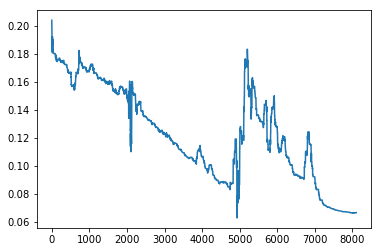

In [55]:
plt.plot(rolling_mean(losses, 100))

In [56]:
res = []
for i in range(100):
    res.append(forward_pass(mpnn, train_smiles[i], passes).data[0][0])

In [ ]:
plt.hist(res)

In [17]:
def forward_pass(self, x, t):
    g, h = self.get_features_from_smiles(x)
    g2, h2 = self.get_features_from_smiles(x)
#     for k, v in h.items():
#         print(v.data.numpy())
    for k in range(0, t):
        self.single_message_pass(g, h, k)
#         print('*'*33)
#         print(h[0])
    y_pred = self.R(h, h2)
    return y_pred

In [ ]:
g, h = mpnn.get_features_from_smiles(train_smiles[10])

In [ ]:
np.array(losses[-50:]).mean()

In [15]:
np.array(train_labels[:100]).mean()

0.19

In [ ]:
for i in range(50):
    print(i, int(train_labels[i]), int(res[i]))

In [57]:
(np.array(res) > 0.5).sum()

13

## 2. Undirected models

In [ ]:
for p in mpnn.params:
    print(p.requires_grad)

In [ ]:
mpnn.params[-2]

In [ ]:
for p in mpnn.params:
    print(p.data.size())